<a href="https://colab.research.google.com/github/khushijhawar/SURVEILLANCE-SPYHOLE/blob/main/Man_Woman_Training_and__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Google Drive Folder** --> https://drive.google.com/drive/folders/1-mtWLZVCOgYJ6-40zNdGs2i6KwwF7Kvm?usp=sharing)

### **TRAINING MODEL**

In [ ]:
#mount google drive
#Do not run this

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#upload kaggle.json file

from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
#download dataset using api command

!kaggle datasets download -d khushijhawar/man-woman

 80% 49.0M/61.3M [00:01<00:00, 24.4MB/s]
100% 61.3M/61.3M [00:01<00:00, 55.0MB/s]


In [ ]:
!unzip "*.zip"

Archive:  man-woman.zip
  inflating: face/man/face_0.jpg     
  inflating: face/man/face_1.jpg     
  inflating: face/man/face_10.jpg    
  inflating: face/man/face_1000.jpg  
  inflating: face/man/face_1001.jpg  
  inflating: face/man/face_1003.jpg  
  inflating: face/man/face_1004.jpg  
  inflating: face/man/face_1005.jpg  
  inflating: face/man/face_1006.jpg  
  inflating: face/man/face_1007.jpg  
  inflating: face/man/face_101.jpg   
  inflating: face/man/face_1010.jpg  
  inflating: face/man/face_1011.jpg  
  inflating: face/man/face_1012.jpg  
  inflating: face/man/face_1014.jpg  
  inflating: face/man/face_1016.jpg  
  inflating: face/man/face_1018.jpg  
  inflating: face/man/face_1019.jpg  
  inflating: face/man/face_1020.jpg  
  inflating: face/man/face_1021.jpg  
  inflating: face/man/face_1022.jpg  
  inflating: face/man/face_1023.jpg  
  inflating: face/man/face_1024.jpg  
  inflating: face/man/face_1025.jpg  
  inflating: face/man/face_1026.jpg  
  inflating: face/man/face

In [ ]:
#import necessary packages

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("face"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


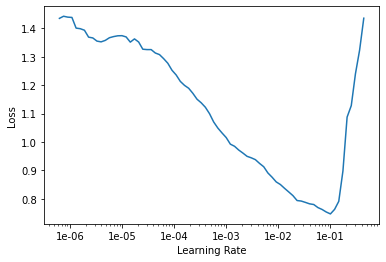

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.148515,0.110333,0.956633,00:23
1,0.149776,0.132325,0.946429,00:22
2,0.164427,0.129873,0.948980,00:22
3,0.148171,0.105605,0.961735,00:22
4,0.129649,0.117618,0.948980,00:22
5,0.121280,0.117613,0.946429,00:22


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr = slice(1e-3, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.159157,0.213509,0.928571,00:24
1,0.175978,0.379597,0.948980,00:24
2,0.148744,0.061988,0.977041,00:23
3,0.120718,0.039588,0.984694,00:24


In [ ]:
#create folder to save the model

my_dir = "/content/drive/My Drive/Geeksman_AISquad_Project1_KhushiJhawar"
os.makedirs(my_dir ,exist_ok=True)

In [ ]:
#Do not run this cell

learn.save(my_dir + "/Stage")

In [ ]:
#Do not run this cell model already exported

learn.export(my_dir+"/export.pkl")

In [ ]:
predictor = load_learner(my_dir)

### **RESULT**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

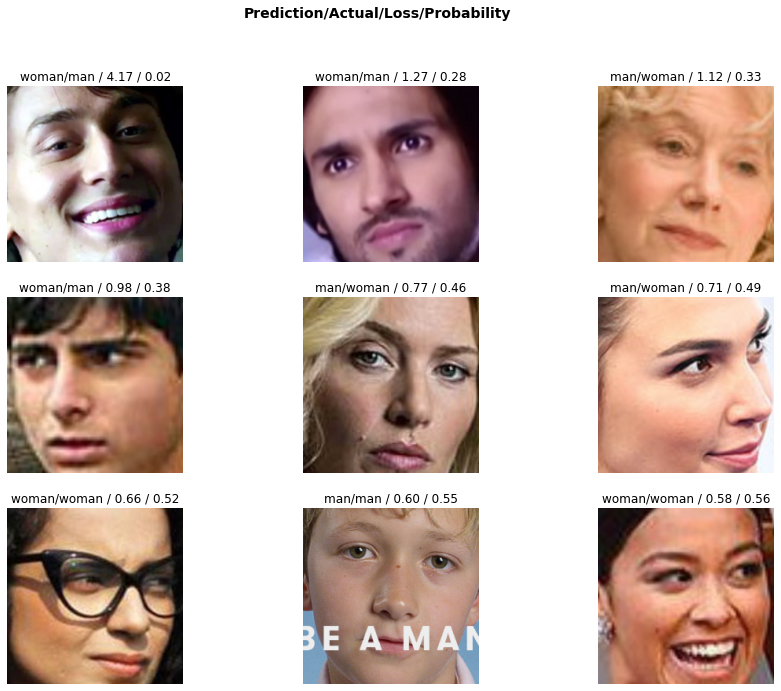

In [ ]:
#looking at the wrong predictions

interp.plot_top_losses(9, figsize=(15,11))

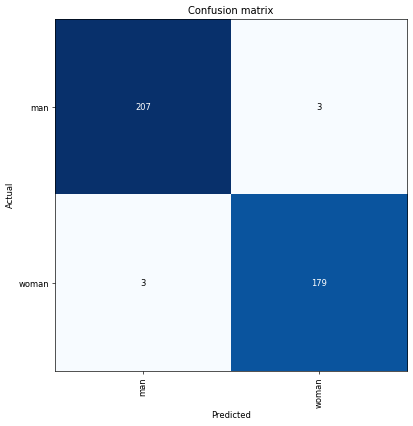

In [ ]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

### **PREDICTIONS**

In [ ]:
#creating prediction function to make predictons of image

def my_predictor(img):
  test_img =open_image(img)
  predict_class,pred_idx,outputs=predictor.predict(test_img)
  return predict_class

In [ ]:
#prediction of photo
#enter url

img_url = ""

import urllib.request
urllib.request.urlretrieve(video_url, "test_img.jpg")

print(my_predictor("test_img.jpg"))
img = open_image("test_img.jpg")
img.show()

In [ ]:
#predictions of video
#enter url
#or you can use one created by me

test_video_url = "https://drive.google.com/uc?id=1Mgx7mcNYGpzXy94LVaEWw2EaNQFIzzXl" #copy it from 0

import urllib.request
urllib.request.urlretrieve(test_video_url, "test_video.mp4")

('test_video.mp4', <http.client.HTTPMessage at 0x7f9f593fab70>)

In [ ]:
#folder containing frames

import os
os.makedirs("frames")

#extracting frames
import cv2

cap= cv2.VideoCapture("test_video.mp4")
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frames/frame'+str(i)+'.jpg',frame)
    i+=1

cap.release()
cv2.destroyAllWindows()

In [ ]:
#predictions for frames created

import cv2
test_files=os.listdir("frames")
dir = "frames"
os.makedirs("test_result",exist_ok=True)

i=0
for test_file in test_files:
  img=cv2.imread(dir+"/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  
  i+=1
  font = cv2.FONT_HERSHEY_SIMPLEX 
  org = (0, 50) 
  fontScale = 1
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

os.remove("temp.jpg")

In [ ]:
#creating video using predicted frames

%cd "/content/test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -r 1 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" ../test_result_video.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [ ]:
#publicly uploading the output video

output_video_url = upload_public("test_result_video.mp4")

In [ ]:
output_video_url

'https://drive.google.com/uc?id=1utKTtvjKj0aX8vSoJpK-_IWLUpXojMG3'

In [ ]:
import shutil
shutil.copyfile("test_result_video.mp4", "/content/drive/My Drive/Geeksman_AISquad_Project1_KhushiJhawar/output_video.mp4")

'/content/drive/My Drive/Geeksman_AISquad_Project1_KhushiJhawar/output_video.mp4'

### **REQUIRED URLS**

In [ ]:
test_video_url

'https://drive.google.com/uc?id=1Mgx7mcNYGpzXy94LVaEWw2EaNQFIzzXl'

In [ ]:
output_video_url

'https://drive.google.com/uc?id=1utKTtvjKj0aX8vSoJpK-_IWLUpXojMG3'

In [ ]:
#Folder contains   1.Stage.pth   2.export.pkl   3.output_video.mp4   4.Presentation.pdf   5.Documentation.pdf
Drive_folder_link = "https://drive.google.com/drive/folders/1-mtWLZVCOgYJ6-40zNdGs2i6KwwF7Kvm?usp=sharing"